In [27]:
#Importamos las liberías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
%matplotlib inline

from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
#import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#import warnings
#warnings.filterwarnings("ignore")

## PREPARACIÓN DE DATOS

In [28]:
#Cargamos el csv
df=pd.read_csv("obesidad_ds.csv",sep=",")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [29]:
#Cambiar los nombres de las columnas
nuevos_nombres_col = ['genero', 'edad', 'altura', 'peso', 'hist_fam', 'alta_cal_frec', 'verduras', 'num_comidas', 'entrehoras', 'fumar', 'agua_dia', 'monit_cal', 'act_fis', 'uso_tecn', 'alcohol', 'transporte', 'diagnostico']
df.columns = nuevos_nombres_col


In [30]:
#Ver los valores de cada columna
for i in df.columns:
    print(df[i].unique())

['Female' 'Male']
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
['yes' 'no']
['no' 'yes']
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.594653 2.88

In [31]:
#Cambiar valores a numéricos
nom_genero={'Female': 0, 'Male': 1}
df['genero'] = df['genero'].replace(nom_genero)

nom_hist_fam={'no': 0, 'yes': 1}
df['hist_fam'] = df['hist_fam'].replace(nom_hist_fam)

nom_alta_cal_frec={'no': 0, 'yes': 1}
df['alta_cal_frec'] = df['alta_cal_frec'].replace(nom_alta_cal_frec)

nom_entrehoras={'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df['entrehoras'] = df['entrehoras'].replace(nom_entrehoras)

nom_fumar={'no': 0, 'yes': 1}
df['fumar'] = df['fumar'].replace(nom_fumar)

nom_monit_cal={'no': 0, 'yes': 1}
df['monit_cal'] = df['monit_cal'].replace(nom_monit_cal)

nom_alcohol={'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df['alcohol'] = df['alcohol'].replace(nom_alcohol)

nom_transporte={'Public_Transportation': 1, 'Walking': 2, 'Automobile': 3, 'Motorbike': 4, 'Bike': 5}
df['transporte'] = df['transporte'].replace(nom_transporte)

nom_diagnostico = {'Normal_Weight': 'normal', 'Insufficient_Weight': 'insuficiente', 'Overweight_Level_I': 'sobrepeso1', 'Overweight_Level_II':'sobrepeso2', 'Obesity_Type_III':'obesidad3','Obesity_Type_II':'obesidad2', 'Obesity_Type_I':'obesidad1'}
df['diagnostico'] = df['diagnostico'].replace(nom_diagnostico)


In [32]:
#Vemos los valores que tiene cada columna y cuantas veces aparece cada uno de ellos
for i in df.columns:
    print(i,df[i].value_counts())

genero 1    1068
0    1043
Name: genero, dtype: int64
edad 18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: edad, Length: 1402, dtype: int64
altura 1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: altura, Length: 1574, dtype: int64
peso 80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: peso, Length: 1525, dtype: int64
hist_fam 1    1726
0     385
Name: hist_fam, dtype: int64
alta_cal_frec 1    1866
0     245
Name: alta_cal_frec, dtype: int64
verduras 3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684

In [33]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genero         2111 non-null   int64  
 1   edad           2111 non-null   float64
 2   altura         2111 non-null   float64
 3   peso           2111 non-null   float64
 4   hist_fam       2111 non-null   int64  
 5   alta_cal_frec  2111 non-null   int64  
 6   verduras       2111 non-null   float64
 7   num_comidas    2111 non-null   float64
 8   entrehoras     2111 non-null   int64  
 9   fumar          2111 non-null   int64  
 10  agua_dia       2111 non-null   float64
 11  monit_cal      2111 non-null   int64  
 12  act_fis        2111 non-null   float64
 13  uso_tecn       2111 non-null   float64
 14  alcohol        2111 non-null   int64  
 15  transporte     2111 non-null   int64  
 16  diagnostico    2111 non-null   object 
dtypes: float64(8), int64(8), object(1)
memory usage: 280

In [34]:
#Cambiar tipo de valores
#df['genero'] = df['genero'].astype(int)
#df

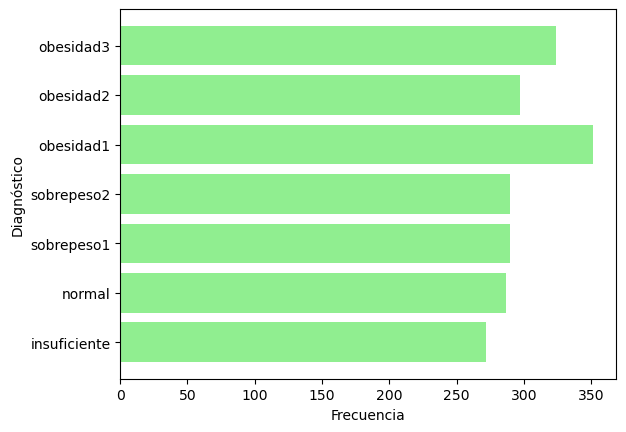

In [35]:
frecuencia_clase = df['diagnostico'].value_counts()

# Define el orden deseado de los diagnósticos
orden_diagnosticos = ['insuficiente', 'normal', 'sobrepeso1', 'sobrepeso2', 'obesidad1', 'obesidad2', 'obesidad3']

# Ordena los valores y diagnósticos en función del orden deseado
frecuencia_clase = frecuencia_clase.loc[orden_diagnosticos]

plt.barh(frecuencia_clase.index, frecuencia_clase.values, color="lightgreen")
plt.xlabel('Frecuencia')
plt.ylabel('Diagnóstico')
plt.show()

In [36]:
nom_diagnostico={'insuficiente': 1, 'normal': 2, 'sobrepeso1': 3, 'sobrepeso2': 4, 'obesidad1': 5, 'obesidad2': 6, 'obesidad3': 7}
df['diagnostico'] = df['diagnostico'].replace(nom_diagnostico)
df

,genero,edad,altura,peso,hist_fam,alta_cal_frec,verduras,num_comidas,entrehoras,fumar,agua_dia,monit_cal,act_fis,uso_tecn,alcohol,transporte,diagnostico
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,2
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,2
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,2
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,2,3
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,7
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,7
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,7
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,7


In [37]:
#Guardamos el dataset como csv
df.to_csv("obesidad_py.csv", index=False)

# PREPROCESAMIENTO

In [38]:
# Dividimos entrada y salida
x=df.iloc[:,0:16]
y=df[["diagnostico"]]
# Dividimos en datos de entrenamiento y de validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Tamaños
x.shape, y.shape

x_train.shape, y_train.shape

x_test.shape, y_test.shape

# Calculamos el máximo y mínimo
maxs = np.max(x_train, axis=0)
mins = np.min(x_train, axis=0)

ranges = maxs - mins

# Normalizamos las variables
x_train = (x_train - mins) / ranges
x_test = (x_test - mins) / ranges

# MODELOS

## Árbol de decisión

              precision    recall  f1-score   support

           1       0.93      0.96      0.95        56
           2       0.89      0.89      0.89        62
           3       0.91      0.93      0.92        56
           4       0.96      0.96      0.96        50
           5       0.96      0.91      0.93        78
           6       0.93      0.95      0.94        58
           7       1.00      1.00      1.00        63

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

cross_value:  0.9395674837982531


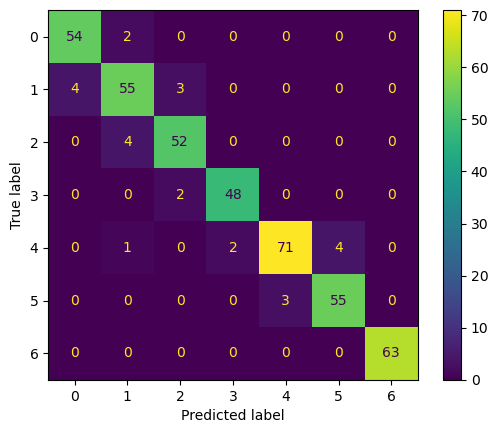

In [39]:
# modelo genérico
DT = DecisionTreeClassifier()
# entrenamos el modelo
DT.fit(x_train, y_train)
# hacer predicciones
pred_DT = DT.predict(x_test)
# informe
print(classification_report(y_test,pred_DT))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    DT, x_train, y_train, cv=kfold, scoring="accuracy"
)
DT_prec=score.mean()
print("cross_value: ", DT_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_DT)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

In [40]:
# ver opciones con otros parametros
DT_combinaciones={}
# parametros
splitter_ = ["best", "random"]
criterion_ = ["gini", "entropy"]
max_features_ = [None,"sqrt", "log2"]
porc_ = [0.2, 0.3]
# combinaciones
for c in criterion_:
    for m in max_features_:
        for s in splitter_:
            for p in [1, 2]:
                vector_parametros=[c,m,s,porc_[p-1]]
                # dividimos las instancias
                x_train, x_test, y_train, y_test = train_test_split(
                    x, y, test_size=porc_[p - 1], random_state=42, shuffle=True
                )
                # modelo
                DT = DecisionTreeClassifier(criterion=c, max_features=m, splitter=s)
                # entrenamos el modelo
                DT.fit(x_train, y_train)
                # hacer predicciones
                predicciones_DT = DT.predict(x_test)
                # calculamos la exactitud del modelo
                acc_1 = accuracy_score(y_test, predicciones_DT)
                # cross value
                kfold = StratifiedKFold(10)
                score = cross_val_score(DT, x_train, y_train, cv=kfold, scoring="accuracy")
                print(
                    c,
                    ",",
                    m,
                    "y",
                    s,
                    "(",
                    porc_[p - 1],
                    ")",
                    "-> accuracy_score: ",
                    acc_1,
                    "//",
                    "cross_value: ",
                    score.mean()
                )
                # añadimos al diccionario esta combinación
                DT_combinaciones[score.mean()]=vector_parametros
                
# calculamos la precisión máxima
DT_max_prec = max(DT_combinaciones)
# miramos con que parámetros se consigue esta precisión
DT_mejor_vector_parametros = DT_combinaciones[DT_max_prec]
print("mejores resultados con los parametros -> ",DT_mejor_vector_parametros)

gini , None y best ( 0.2 ) -> accuracy_score:  0.9432624113475178 // cross_value:  0.9419484361792053
gini , None y best ( 0.3 ) -> accuracy_score:  0.916403785488959 // cross_value:  0.9329748115462401
gini , None y random ( 0.2 ) -> accuracy_score:  0.9125295508274232 // cross_value:  0.8969111017187938
gini , None y random ( 0.3 ) -> accuracy_score:  0.9006309148264984 // cross_value:  0.8896488325059753
gini , sqrt y best ( 0.2 ) -> accuracy_score:  0.7990543735224587 // cross_value:  0.8430332488024795
gini , sqrt y best ( 0.3 ) -> accuracy_score:  0.8564668769716088 // cross_value:  0.8463458356315499
gini , sqrt y random ( 0.2 ) -> accuracy_score:  0.8108747044917257 // cross_value:  0.8157650042265427
gini , sqrt y random ( 0.3 ) -> accuracy_score:  0.7728706624605678 // cross_value:  0.7948198198198199
gini , log2 y best ( 0.2 ) -> accuracy_score:  0.8581560283687943 // cross_value:  0.8578085376162299
gini , log2 y best ( 0.3 ) -> accuracy_score:  0.8012618296529969 // cross_

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        56
           2       0.95      0.89      0.92        62
           3       0.92      1.00      0.96        56
           4       1.00      0.94      0.97        50
           5       0.97      0.97      0.97        78
           6       0.97      0.97      0.97        58
           7       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

cross_value:  0.9520111298957452


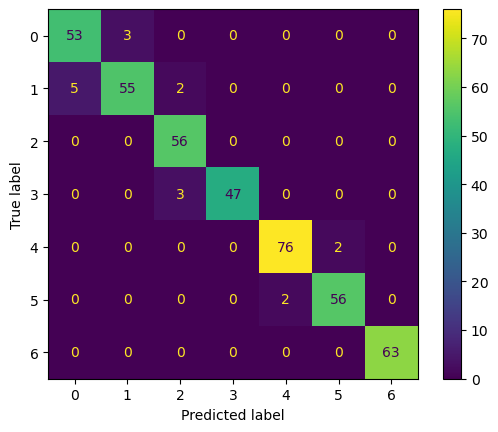

In [41]:
# mejor modelo (utilizando el vector conseguido anteriormente)
DT_mejor = DecisionTreeClassifier(criterion=DT_mejor_vector_parametros[0], max_features=DT_mejor_vector_parametros[1], splitter=DT_mejor_vector_parametros[2])
# dividimos las instancias 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=DT_mejor_vector_parametros[3], random_state=42, shuffle=True)
# entrenamos el modelo
DT_mejor.fit(x_train, y_train)
# hacer predicciones
pred_DT_mejor = DT_mejor.predict(x_test)
# informe
print(classification_report(y_test,pred_DT_mejor))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    DT_mejor, x_train, y_train, cv=kfold, scoring="accuracy"
)
DT_mejor_prec=score.mean()
print("cross_value: ", DT_mejor_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_DT_mejor)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

## Random forest

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        56
           2       0.89      0.92      0.90        62
           3       0.89      0.89      0.89        56
           4       0.94      0.96      0.95        50
           5       0.99      0.96      0.97        78
           6       0.97      0.98      0.97        58
           7       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423

cross_value:  0.9514440687517611


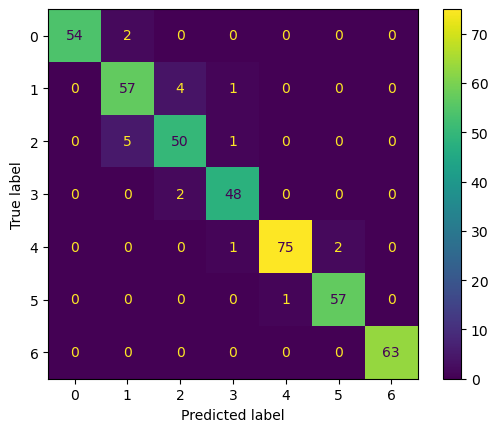

In [42]:
# modelo genérico
y_ravel= np.ravel(y)
RF = RandomForestClassifier()
# entrenamos el modelo
y_train=y_train.values.ravel()
RF.fit(x_train, y_train)
# hacer predicciones
pred_RF = RF.predict(x_test)
# informe
print(classification_report(y_test,pred_RF,zero_division=0))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    RF, x_train, y_train, cv=kfold, scoring="accuracy"
)
RF_prec=score.mean()
print("cross_value: ", RF_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_RF)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

In [43]:
# ver opciones con otros parámetros
RF_combinaciones={}
# parametros
criterion_ = ["gini", "entropy"]
max_features_ = [None,"sqrt", "log2"]
porc_ = [0.2, 0.3]
# combinaciones
for c in criterion_:
    for m in max_features_:
        for p in [1, 2]:
            vector_parametros=[c,m,porc_[p-1]]
            # dividimos las instancias
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=porc_[p - 1], random_state=42, shuffle=True)
            y_train=y_train.values.ravel()
            # modelo
            RF = RandomForestClassifier(criterion=c, max_features=m)
            # entrenamos el modelo
            RF.fit(x_train, y_train)
            # hacer predicciones
            predicciones_RF = RF.predict(x_test)
            # calculamos la exactitud del modelo
            acc_1 = accuracy_score(y_test, predicciones_RF)
            # cross value
            kfold = StratifiedKFold(10)
            score = cross_val_score(RF, x_train, y_train, cv=kfold, scoring="accuracy")
            print(
                c,
                "y",
                m,
                "(",
                porc_[p - 1],
                ")",
                "-> accuracy_score: ",
                acc_1,
                "//",
                "cross_value: ",
                score.mean()
            )
            # añadimos al diccionario esta combinación
            RF_combinaciones[score.mean()]=vector_parametros
                
# calculamos la precisión máxima
RF_max_prec = max(RF_combinaciones)
# miramos con que parámetros se consigue esta precisión
RF_mejor_vector_parametros = RF_combinaciones[RF_max_prec]
print("mejores resultados con los parametros -> ",RF_mejor_vector_parametros)

gini y None ( 0.2 ) -> accuracy_score:  0.950354609929078 // cross_value:  0.9543779938010706
gini y None ( 0.3 ) -> accuracy_score:  0.9353312302839116 // cross_value:  0.9566602316602317
gini y sqrt ( 0.2 ) -> accuracy_score:  0.9527186761229315 // cross_value:  0.9579459002535925
gini y sqrt ( 0.3 ) -> accuracy_score:  0.9369085173501577 // cross_value:  0.9512548262548263
gini y log2 ( 0.2 ) -> accuracy_score:  0.950354609929078 // cross_value:  0.9544061707523246
gini y log2 ( 0.3 ) -> accuracy_score:  0.9384858044164038 // cross_value:  0.9587056444199302
entropy y None ( 0.2 ) -> accuracy_score:  0.9645390070921985 // cross_value:  0.9626831501831502
entropy y None ( 0.3 ) -> accuracy_score:  0.9574132492113565 // cross_value:  0.9614175399889687
entropy y sqrt ( 0.2 ) -> accuracy_score:  0.9598108747044918 // cross_value:  0.9520252183713722
entropy y sqrt ( 0.3 ) -> accuracy_score:  0.9384858044164038 // cross_value:  0.9526061776061777
entropy y log2 ( 0.2 ) -> accuracy_score

              precision    recall  f1-score   support

           1       0.93      0.96      0.95        56
           2       0.95      0.89      0.92        62
           3       0.92      0.98      0.95        56
           4       1.00      0.96      0.98        50
           5       0.97      0.97      0.97        78
           6       0.97      0.97      0.97        58
           7       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

cross_value:  0.962087912087912


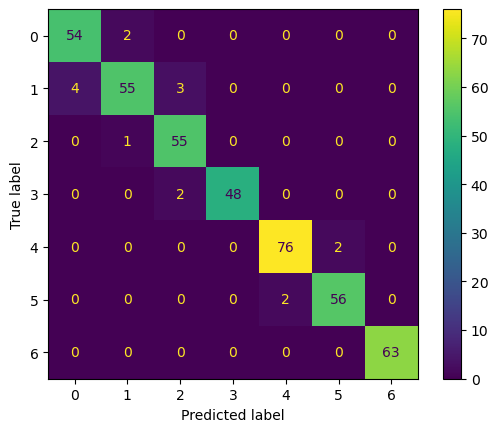

In [44]:
# mejor modelo (utilizando el vector conseguido anteriormente)
RF_mejor = RandomForestClassifier(criterion=RF_mejor_vector_parametros[0], max_features=RF_mejor_vector_parametros[1])
# dividimos las instancias 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=RF_mejor_vector_parametros[2], random_state=42, shuffle=True)
y_train=y_train.values.ravel()
# entrenamos el modelo
RF_mejor.fit(x_train, y_train)
# hacer predicciones
pred_RF_mejor = RF_mejor.predict(x_test)
# informe
print(classification_report(y_test,pred_RF_mejor))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    RF_mejor, x_train, y_train, cv=kfold, scoring="accuracy"
)
RF_mejor_prec=score.mean()
print("cross_value: ", RF_mejor_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_RF_mejor)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

## Redes neuronales 

Epoch 1/10
53/53 [==============================] - 2s 11ms/step - loss: 1.6523 - accuracy: 0.4514 - val_loss: 1.3150 - val_accuracy: 0.5626
Epoch 2/10
53/53 [==============================] - 0s 4ms/step - loss: 1.0902 - accuracy: 0.6274 - val_loss: 0.9423 - val_accuracy: 0.6738
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.8137 - accuracy: 0.7305 - val_loss: 0.7598 - val_accuracy: 0.7494
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 0.6603 - accuracy: 0.7879 - val_loss: 0.6425 - val_accuracy: 0.7896
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.5570 - accuracy: 0.8158 - val_loss: 0.5544 - val_accuracy: 0.8180
Epoch 6/10
53/53 [==============================] - 0s 6ms/step - loss: 0.4729 - accuracy: 0.8507 - val_loss: 0.4896 - val_accuracy: 0.8274
Epoch 7/10
53/53 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.8709 - val_loss: 0.4288 - val_accuracy: 0.8747
Epoch 8/10
53/53 [=

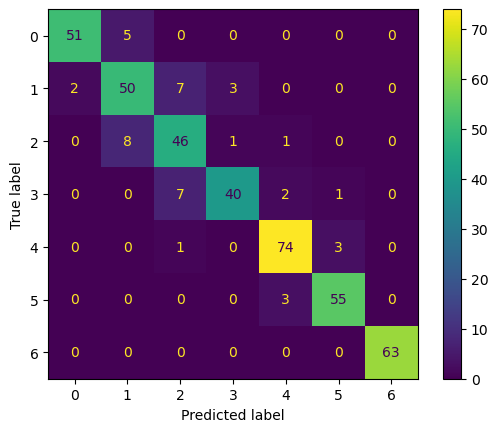

Epoch 1/10
53/53 [==============================] - 1s 10ms/step - loss: 0.2416 - accuracy: 0.9360 - val_loss: 0.3206 - val_accuracy: 0.8913
Epoch 2/10
53/53 [==============================] - 0s 4ms/step - loss: 0.2375 - accuracy: 0.9354 - val_loss: 0.3151 - val_accuracy: 0.8913
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2334 - accuracy: 0.9390 - val_loss: 0.3122 - val_accuracy: 0.8960
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2292 - accuracy: 0.9402 - val_loss: 0.3078 - val_accuracy: 0.8960
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.9425 - val_loss: 0.3053 - val_accuracy: 0.8960
Epoch 6/10
53/53 [==============================] - 0s 6ms/step - loss: 0.2212 - accuracy: 0.9425 - val_loss: 0.3026 - val_accuracy: 0.8960
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2176 - accuracy: 0.9408 - val_loss: 0.2983 - val_accuracy: 0.8983
Epoch 8/10
53/53 [=

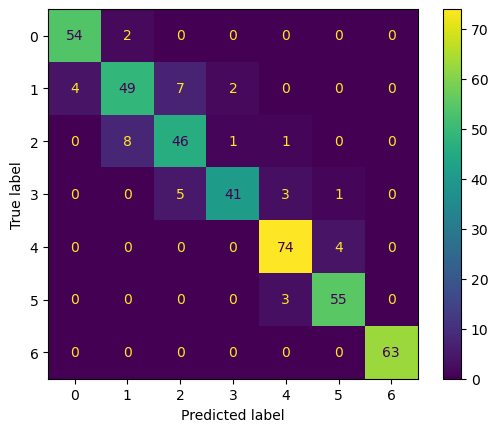

Epoch 1/10
53/53 [==============================] - 1s 8ms/step - loss: 0.2088 - accuracy: 0.9419 - val_loss: 0.2685 - val_accuracy: 0.9125
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9556 - val_loss: 0.2570 - val_accuracy: 0.9125
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9597 - val_loss: 0.2405 - val_accuracy: 0.9267
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.9668 - val_loss: 0.2452 - val_accuracy: 0.9173
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9686 - val_loss: 0.2333 - val_accuracy: 0.9196
Epoch 6/10
53/53 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9757 - val_loss: 0.2195 - val_accuracy: 0.9291
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9781 - val_loss: 0.2098 - val_accuracy: 0.9385
Epoch 8/10
53/53 [==

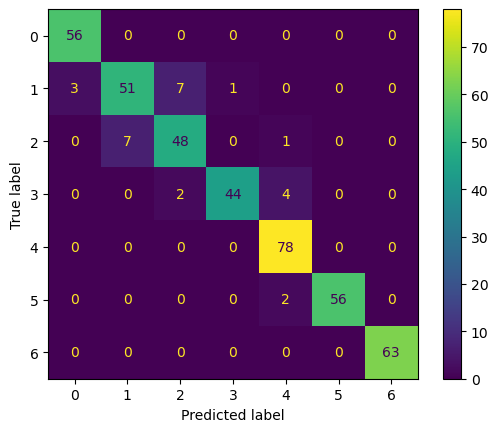

Epoch 1/10
53/53 [==============================] - 1s 6ms/step - loss: 0.0653 - accuracy: 0.9923 - val_loss: 0.1999 - val_accuracy: 0.9314
Epoch 2/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9923 - val_loss: 0.1978 - val_accuracy: 0.9314
Epoch 3/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0625 - accuracy: 0.9923 - val_loss: 0.1967 - val_accuracy: 0.9314
Epoch 4/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9923 - val_loss: 0.1960 - val_accuracy: 0.9338
Epoch 5/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9923 - val_loss: 0.1956 - val_accuracy: 0.9338
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.9923 - val_loss: 0.1953 - val_accuracy: 0.9338
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0610 - accuracy: 0.9923 - val_loss: 0.1950 - val_accuracy: 0.9314
Epoch 8/10
53/53 [==

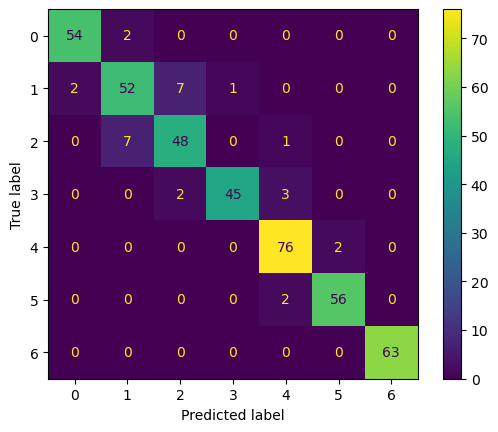

Epoch 1/10
53/53 [==============================] - 2s 11ms/step - loss: 0.0658 - accuracy: 0.9911 - val_loss: 0.1931 - val_accuracy: 0.9291
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0587 - accuracy: 0.9941 - val_loss: 0.1938 - val_accuracy: 0.9385
Epoch 3/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9929 - val_loss: 0.1925 - val_accuracy: 0.9338
Epoch 4/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9935 - val_loss: 0.1909 - val_accuracy: 0.9385
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9953 - val_loss: 0.1913 - val_accuracy: 0.9385
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0514 - accuracy: 0.9953 - val_loss: 0.1918 - val_accuracy: 0.9362
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0496 - accuracy: 0.9959 - val_loss: 0.1933 - val_accuracy: 0.9291
Epoch 8/10
53/53 [=

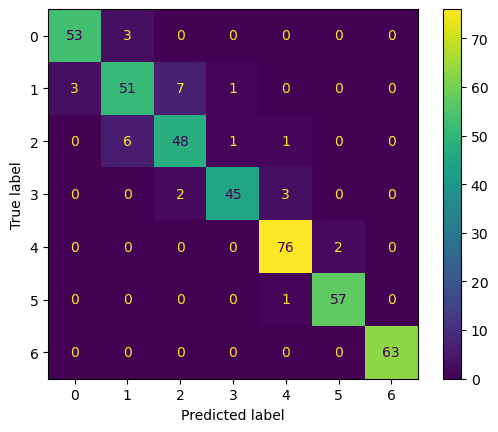

Epoch 1/10
53/53 [==============================] - 3s 12ms/step - loss: 1.6456 - accuracy: 0.4313 - val_loss: 1.2039 - val_accuracy: 0.6052
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.9364 - accuracy: 0.6588 - val_loss: 0.7927 - val_accuracy: 0.7163
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.6363 - accuracy: 0.7778 - val_loss: 0.5715 - val_accuracy: 0.8109
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 0.4572 - accuracy: 0.8543 - val_loss: 0.4288 - val_accuracy: 0.8463
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.3398 - accuracy: 0.8916 - val_loss: 0.3303 - val_accuracy: 0.8936
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.9319 - val_loss: 0.2798 - val_accuracy: 0.9102
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.1917 - accuracy: 0.9538 - val_loss: 0.2343 - val_accuracy: 0.9291
Epoch 8/10
53/53 [=

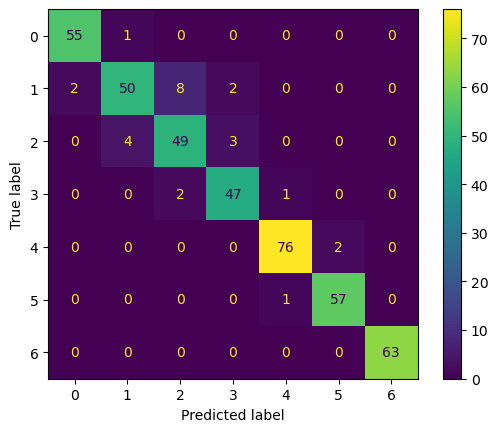

Epoch 1/10
53/53 [==============================] - 1s 6ms/step - loss: 0.0723 - accuracy: 0.9899 - val_loss: 0.1738 - val_accuracy: 0.9433
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9917 - val_loss: 0.1715 - val_accuracy: 0.9409
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9917 - val_loss: 0.1721 - val_accuracy: 0.9362
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9929 - val_loss: 0.1709 - val_accuracy: 0.9385
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9923 - val_loss: 0.1673 - val_accuracy: 0.9456
Epoch 6/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9941 - val_loss: 0.1668 - val_accuracy: 0.9456
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9935 - val_loss: 0.1701 - val_accuracy: 0.9385
Epoch 8/10
53/53 [==

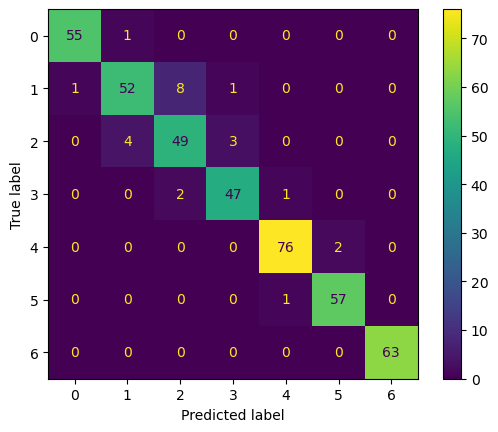

Epoch 1/10
53/53 [==============================] - 2s 13ms/step - loss: 0.0685 - accuracy: 0.9882 - val_loss: 0.1626 - val_accuracy: 0.9385
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 0.9899 - val_loss: 0.1640 - val_accuracy: 0.9433
Epoch 3/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0395 - accuracy: 0.9929 - val_loss: 0.1705 - val_accuracy: 0.9456
Epoch 4/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.9947 - val_loss: 0.1638 - val_accuracy: 0.9527
Epoch 5/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9953 - val_loss: 0.1511 - val_accuracy: 0.9504
Epoch 6/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0204 - accuracy: 0.9988 - val_loss: 0.1548 - val_accuracy: 0.9504
Epoch 7/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.9994 - val_loss: 0.1948 - val_accuracy: 0.9456
Epoch 8/10
53/53 [=

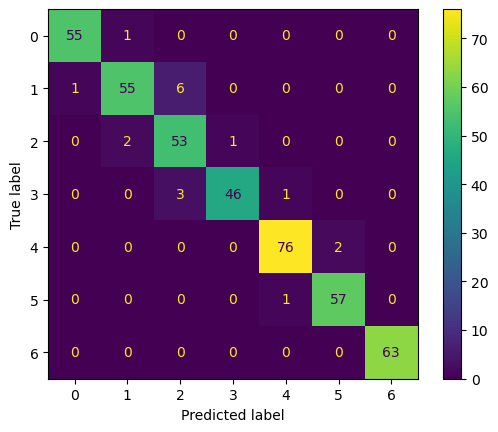

Epoch 1/10
53/53 [==============================] - 2s 11ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1561 - val_accuracy: 0.9551
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9551
Epoch 3/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1534 - val_accuracy: 0.9551
Epoch 4/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1528 - val_accuracy: 0.9551
Epoch 5/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1524 - val_accuracy: 0.9551
Epoch 6/10
53/53 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1521 - val_accuracy: 0.9551
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9551
Epoch 8/10
53/53 [=

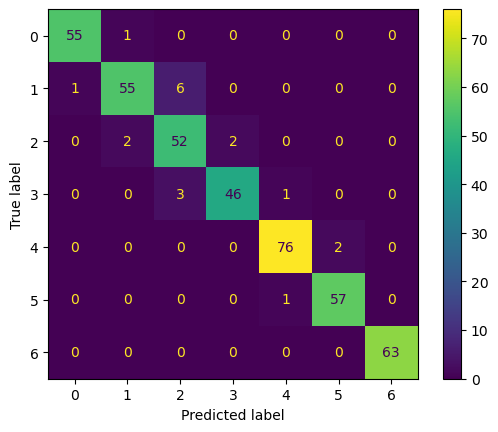

Epoch 1/10
53/53 [==============================] - 2s 6ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 0.9551
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9551
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9551
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1549 - val_accuracy: 0.9574
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1572 - val_accuracy: 0.9598
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1619 - val_accuracy: 0.9574
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1599 - val_accuracy: 0.9598
Epoch 8/10
53/53 [==

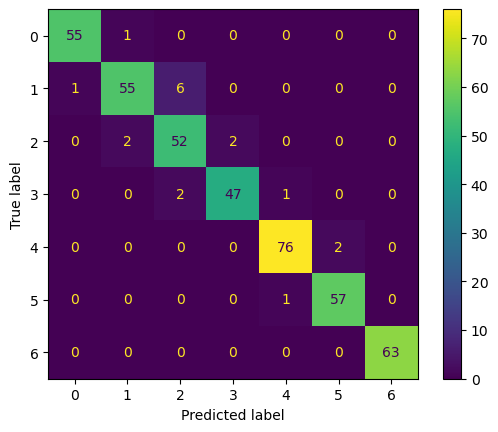

Epoch 1/10
53/53 [==============================] - 1s 10ms/step - loss: 1.5377 - accuracy: 0.4656 - val_loss: 1.0576 - val_accuracy: 0.6241
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.8706 - accuracy: 0.6647 - val_loss: 0.7450 - val_accuracy: 0.6809
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.7938 - val_loss: 0.5138 - val_accuracy: 0.8369
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 0.4088 - accuracy: 0.8578 - val_loss: 0.3850 - val_accuracy: 0.8794
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.9076 - val_loss: 0.2963 - val_accuracy: 0.8889
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.9301 - val_loss: 0.2555 - val_accuracy: 0.9054
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.1888 - accuracy: 0.9354 - val_loss: 0.2397 - val_accuracy: 0.9173
Epoch 8/10
53/53 [=

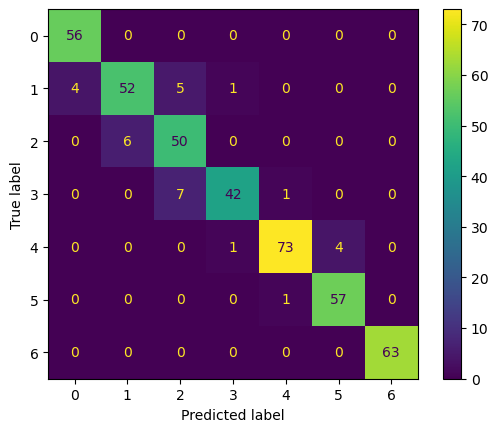

Epoch 1/10
53/53 [==============================] - 2s 12ms/step - loss: 0.0620 - accuracy: 0.9870 - val_loss: 0.1797 - val_accuracy: 0.9480
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.9899 - val_loss: 0.1844 - val_accuracy: 0.9433
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.9911 - val_loss: 0.1796 - val_accuracy: 0.9433
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0501 - accuracy: 0.9941 - val_loss: 0.1819 - val_accuracy: 0.9456
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0480 - accuracy: 0.9935 - val_loss: 0.1779 - val_accuracy: 0.9456
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9941 - val_loss: 0.1797 - val_accuracy: 0.9433
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0449 - accuracy: 0.9941 - val_loss: 0.1822 - val_accuracy: 0.9456
Epoch 8/10
53/53 [=

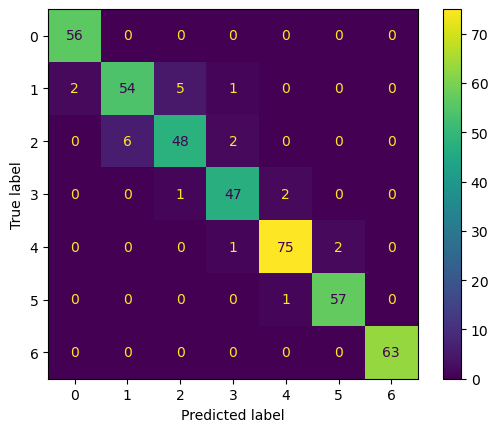

Epoch 1/10
53/53 [==============================] - 2s 12ms/step - loss: 0.0682 - accuracy: 0.9763 - val_loss: 0.2407 - val_accuracy: 0.9196
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.3352 - val_accuracy: 0.8842
Epoch 3/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9805 - val_loss: 0.1701 - val_accuracy: 0.9362
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9917 - val_loss: 0.1728 - val_accuracy: 0.9385
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9887 - val_loss: 0.1851 - val_accuracy: 0.9362
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9905 - val_loss: 0.1947 - val_accuracy: 0.9409
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9970 - val_loss: 0.2892 - val_accuracy: 0.9149
Epoch 8/10
53/53 [=

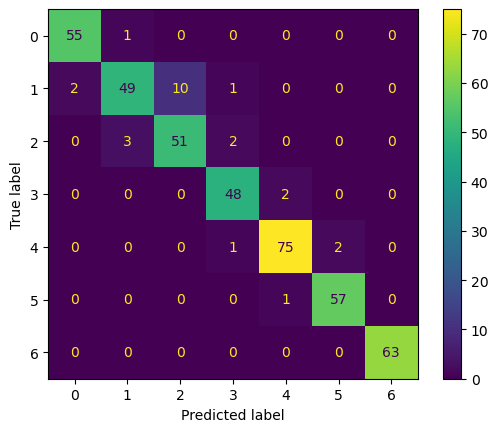

Epoch 1/10
53/53 [==============================] - 1s 6ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1946 - val_accuracy: 0.9480
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1912 - val_accuracy: 0.9504
Epoch 3/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1900 - val_accuracy: 0.9504
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1892 - val_accuracy: 0.9504
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1889 - val_accuracy: 0.9504
Epoch 6/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1885 - val_accuracy: 0.9504
Epoch 7/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1882 - val_accuracy: 0.9504
Epoch 8/10
53/53 [==

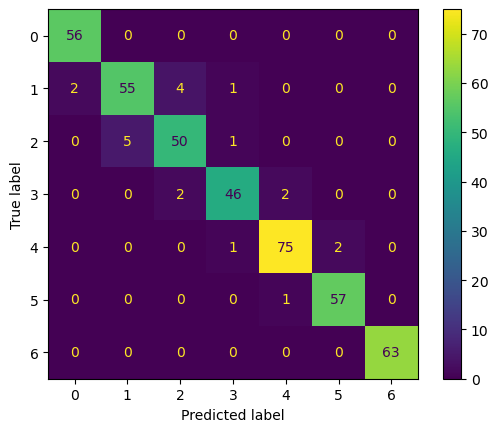

Epoch 1/10
53/53 [==============================] - 2s 12ms/step - loss: 0.0059 - accuracy: 0.9994 - val_loss: 0.1903 - val_accuracy: 0.9504
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1902 - val_accuracy: 0.9504
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1872 - val_accuracy: 0.9480
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1924 - val_accuracy: 0.9551
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1935 - val_accuracy: 0.9527
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1923 - val_accuracy: 0.9527
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1939 - val_accuracy: 0.9504
Epoch 8/10
53/53 [=

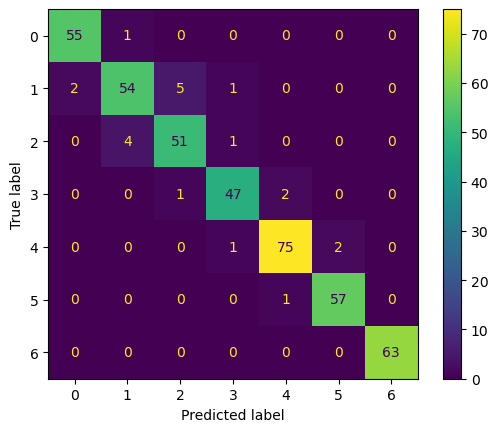

{0.8959810874704491: [1, 'adam'], 0.9030732860520094: [1, 'SGD'], 0.9361702127659575: [1, 'RMSprop'], 0.9314420803782506: [1, 'adagrad'], 0.9290780141843972: [3, 'adam'], 0.9385342789598109: [2, 'adam'], 0.9432624113475178: [2, 'SGD'], 0.9574468085106383: [2, 'adamax'], 0.9550827423167849: [2, 'adagrad'], 0.9456264775413712: [3, 'SGD'], 0.9408983451536643: [3, 'RMSprop'], 0.950354609929078: [3, 'adamax']}
mejores resultados con los parametros ->  [2, 'adamax']


In [45]:
optim=["adam","SGD","RMSprop","adagrad","adamax"]
RN_combinaciones={}

# Separa los atributos y las etiquetas de diagnóstico
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values -1

# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Escala los atributos para normalizarlos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# ESTRUCTURA 1
RNmodel = Sequential()

# Agrega capas densas (totalmente conectadas) al modelo
RNmodel.add(Dense(64, activation='relu', input_shape=(16,)))  # Capa oculta 1
RNmodel.add(Dense(64, activation='relu'))  # Capa oculta 2
RNmodel.add(Dense(7, activation='softmax'))  # Capa de salida (7 niveles de obesidad)

for i in optim:
    # Compila el modelo
    RNmodel.compile(optimizer=i, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrena el modelo
    RNmodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    y_pred_prob = RNmodel.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    print(y_pred)
    # Calcular precisión
    precision = accuracy_score(y_test, y_pred)
    print("Precisión:", precision)

    # Calcular matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    ConfusionMatrixDisplay(matriz_confusion).plot()
    plt.show()
    
    RN_combinaciones[precision]=[1,i]
    
# ESTRUCTURA 2
RNmodel = Sequential()

# Agrega capas densas (totalmente conectadas) al modelo
RNmodel.add(Dense(128, activation='relu', input_shape=(16,)))  # Capa oculta 1
RNmodel.add(Dense(64, activation='relu'))  # Capa oculta 2
RNmodel.add(Dense(32, activation='relu'))  # Capa oculta 3
RNmodel.add(Dense(7, activation='softmax'))  # Capa de salida (7 niveles de obesidad)

for i in optim:
    # Compila el modelo
    RNmodel.compile(optimizer=i, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrena el modelo
    RNmodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    y_pred_prob = RNmodel.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # Calcular precisión
    precision = accuracy_score(y_test, y_pred)
    print("Precisión:", precision)

    # Calcular matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    ConfusionMatrixDisplay(matriz_confusion).plot()
    plt.show()
    
    RN_combinaciones[precision] = [2, i]
    
# ESTRUCTURA 3
RNmodel = Sequential()

# Agrega capas densas (totalmente conectadas) al modelo
RNmodel.add(Dense(64, activation='relu', input_shape=(16,)))  # Capa oculta 1
RNmodel.add(Dense(128, activation='relu'))  # Capa oculta 2
RNmodel.add(Dense(64, activation='relu'))  # Capa oculta 3
RNmodel.add(Dense(32, activation='relu'))  # Capa oculta 4
RNmodel.add(Dense(7, activation='softmax'))  # Capa de salida (7 niveles de obesidad)

for i in optim:
    # Compila el modelo
    RNmodel.compile(optimizer=i, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrena el modelo
    RNmodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    y_pred_prob = RNmodel.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # Calcular precisión
    precision = accuracy_score(y_test, y_pred)
    print("Precisión:", precision)

    # Calcular matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:")
    ConfusionMatrixDisplay(matriz_confusion).plot()
    plt.show()
    
    RN_combinaciones[precision] = [3, i]
    
print(RN_combinaciones)
# calculamos la precisión máxima
RN_max_prec = max(RN_combinaciones)
# miramos con que parámetros se consigue esta precisión
RN_mejor_vector_parametros = RN_combinaciones[RN_max_prec]
print("mejores resultados con los parametros -> ",RN_mejor_vector_parametros)

Epoch 1/40
53/53 [==============================] - 2s 12ms/step - loss: 1.7668 - accuracy: 0.3803 - val_loss: 1.5642 - val_accuracy: 0.5130
Epoch 2/40
53/53 [==============================] - 0s 5ms/step - loss: 1.3699 - accuracy: 0.5983 - val_loss: 1.2319 - val_accuracy: 0.6312
Epoch 3/40
53/53 [==============================] - 0s 5ms/step - loss: 1.0892 - accuracy: 0.6499 - val_loss: 1.0100 - val_accuracy: 0.6927
Epoch 4/40
53/53 [==============================] - 0s 5ms/step - loss: 0.9008 - accuracy: 0.7174 - val_loss: 0.8589 - val_accuracy: 0.7210
Epoch 5/40
53/53 [==============================] - 0s 5ms/step - loss: 0.7740 - accuracy: 0.7518 - val_loss: 0.7519 - val_accuracy: 0.7589
Epoch 6/40
53/53 [==============================] - 0s 5ms/step - loss: 0.6787 - accuracy: 0.7808 - val_loss: 0.6724 - val_accuracy: 0.7707
Epoch 7/40
53/53 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.7998 - val_loss: 0.6101 - val_accuracy: 0.7825
Epoch 8/40
53/53 [=

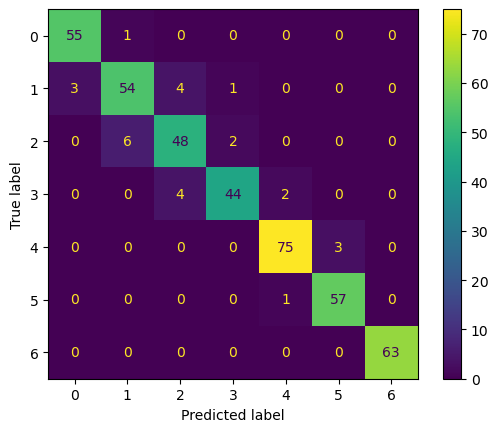

In [47]:
# Mejor modelo

RNmodel_mejor = Sequential()

if RN_mejor_vector_parametros[0]==1:
    RNmodel_mejor.add(Dense(64, activation='relu', input_shape=(16,)))  # Capa oculta 1
    RNmodel_mejor.add(Dense(64, activation='relu'))  # Capa oculta 2
    RNmodel_mejor.add(Dense(7, activation='softmax'))  # Capa de salida (7 niveles de obesidad)
elif RN_mejor_vector_parametros[0]==2:
    RNmodel_mejor.add(Dense(128, activation='relu', input_shape=(16,)))  # Capa oculta 1
    RNmodel_mejor.add(Dense(64, activation='relu'))  # Capa oculta 2
    RNmodel_mejor.add(Dense(32, activation='relu'))  # Capa oculta 3
    RNmodel_mejor.add(Dense(7, activation='softmax'))  # Capa de salida (7 niveles de obesidad)
elif RN_mejor_vector_parametros[0]==3:
    RNmodel_mejor.add(Dense(64, activation='relu', input_shape=(16,)))  # Capa oculta 1
    RNmodel_mejor.add(Dense(128, activation='relu'))  # Capa oculta 2
    RNmodel_mejor.add(Dense(64, activation='relu'))  # Capa oculta 3
    RNmodel_mejor.add(Dense(32, activation='relu'))  # Capa oculta 4
    RNmodel_mejor.add(Dense(7, activation='softmax'))  # Capa de salida (7 niveles de obesidad)
# Compila el modelo
RNmodel_mejor.compile(optimizer=RN_mejor_vector_parametros[1], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
RNmodel_mejor.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test))

y_pred_prob = RNmodel_mejor.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calcular precisión
RN_mejor_prec = accuracy_score(y_test, y_pred)
print("Precisión:", RN_mejor_prec)

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
ConfusionMatrixDisplay(matriz_confusion).plot()
plt.show()

## KNN

[2, 0.8228679788597617]


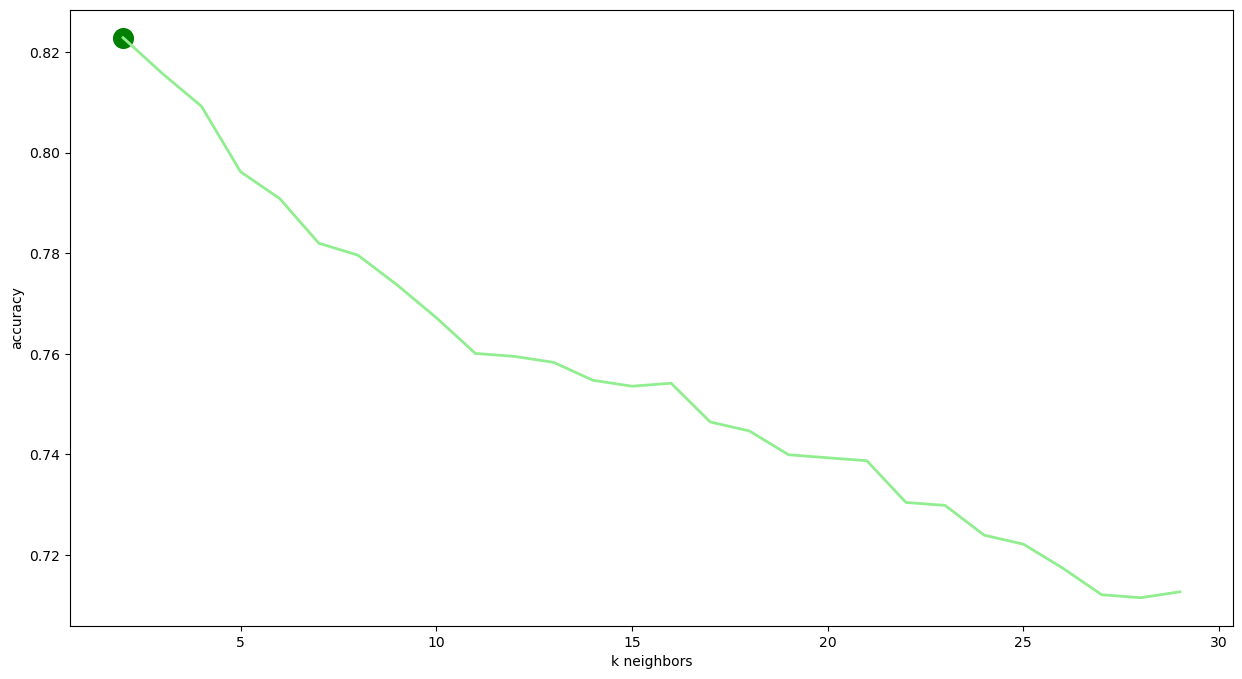

In [48]:
avg_score=[]
max_score=0
best_k=0
for k in range(2,30):
    knn_model=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn_model,x_train,y_train,cv=5,scoring='accuracy')
    if score.mean()>max_score:
        max_score=score.mean()
        best_k=k
    avg_score.append(score.mean())

print([best_k,max(avg_score)])

max_index = avg_score.index(max(avg_score))
max_value = max(avg_score)

plt.figure(figsize=(15, 8))
plt.plot(range(2, 30), avg_score, color='lightgreen', linewidth=2)  
plt.scatter(max_index+2, max_value, color='green', marker='o', s=200)  
plt.xlabel("k neighbors")
plt.ylabel("accuracy")

plt.show()

              precision    recall  f1-score   support

           0       0.71      0.96      0.82        56
           1       0.73      0.52      0.60        62
           2       0.77      0.71      0.74        56
           3       0.69      0.82      0.75        50
           4       0.88      0.81      0.84        78
           5       0.98      0.95      0.96        58
           6       0.98      1.00      0.99        63

    accuracy                           0.82       423
   macro avg       0.82      0.82      0.82       423
weighted avg       0.83      0.82      0.82       423

cross_value:  0.8305966469428008


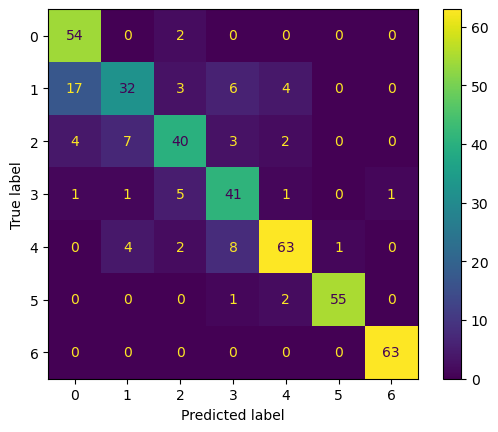

In [49]:
# modelo
KNN=KNeighborsClassifier(n_neighbors=best_k)
# entrenamos el modelo
KNN.fit(x_train,y_train)
# hacer predicciones
pred_KNN = KNN.predict(x_test)
# informe
print(classification_report(y_test,pred_KNN,zero_division=0))
# cross value
kfold = StratifiedKFold(10)
score = cross_val_score(
    KNN, x_train, y_train, cv=kfold, scoring="accuracy"
)
KNN_prec=score.mean()
print("cross_value: ", KNN_prec)
# matriz de confusión
mat_conf = confusion_matrix(y_test, pred_KNN)
ConfusionMatrixDisplay(mat_conf).plot()
plt.show()

# DIAGNOSIS

In [ ]:
nombre_v=str(input("Ahora introduciras los datos médicos del paciente con nombre o identificador: "))

genero_v=int(input("genero (0=mujer)(1=hombre): "))
edad_v=float(input("edad en años: "))
altura_v=float(input("altura en metros: "))
peso_v=float(input("peso en kg: "))
hist_fam_v=int(input("¿Tiene antecedentes familiares? (0=no)(1=si): "))
alta_cal_frec_v=int(input("¿Consume comida altamente calórica? (0=no)(1=si): "))
verduras_v=float(input("Cantidad de verduras semanales: "))
num_comidas_v=float(input("Cantidad de comidas diarias: "))
entrehoras_v=int(input("¿Come entre horas? (0=nunca)(1=a veces)(2=frecuentemente)(3=siempre): "))
fumar_v=int(input("¿Fuma? (0=no)(1=si): "))
agua_dia_v=float(input("Litros de agua diarios: "))
monit_cal_v=int(input("¿Monitoriza las calorías que consume? (0=no)(1=si): "))
act_fis_v=float(input("Días semanales de actividad física: "))
uso_tecn_v=float(input("Horas diarias de uso de la tecnología: "))
alcohol_v=int(input("¿Toma bebidas alcohólicas? (0=nunca)(1=a veces)(2=frecuentemente)(3=siempre): "))
transporte_v=int(input("¿Transporte habitual?(1=transporte público)(2=a pie)(3=automóvil)(4=motocicleta)(5=bicicleta): "))

In [50]:
pac=[genero_v, edad_v, altura_v, peso_v, hist_fam_v, alta_cal_frec_v, verduras_v, num_comidas_v, entrehoras_v, fumar_v, agua_dia_v, monit_cal_v, act_fis_v, uso_tecn_v, alcohol_v, transporte_v]
#nombre_v="oijan"
#pac=[0,26,1.622,110.79,1,1,3,3,1,0,2.7,0,0,0.29,1,1]

# Crear los DataFrames que necesitaremos
df_diagnostico = pd.DataFrame(columns=['Método', 'Características', 'Precisión', 'Diagnóstico', 'Diagnóstico_nombre'])

df_datos=pd.DataFrame({'medida':['género', 'edad', 'altura', 'peso', 'hist_fam', 'alta_cal_frec', 'verduras','num_comidas','entrehoras','fumar','agua_dia','monit_cal','act_fis','uso_tecn','alcohol','transporte'],
                     'valor':pac})

df_nombre=pd.DataFrame({'nombre':[nombre_v]})

# Predecir diagnóstico con diferentes métodos
DT_predict=int(DT_mejor.predict([pac]))
RF_predict=int(RF_mejor.predict([pac]))
pac_scaled = scaler.transform([pac])  # Escala el vector pac
y_pred_prob = RNmodel_mejor.predict(pac_scaled)
RN_predict = np.argmax(y_pred_prob, axis=1)
KNN_predict=int(KNN.predict([pac]))
# Añadir registros al DataFrame
def diag_nom(diagnostico):
    if diagnostico==1:
        return "insuficiente"
    elif diagnostico==2:
        return "normal"
    elif diagnostico==3:
        return "sobrepeso 1"
    elif diagnostico==4:
        return "sobrepeso 2"
    elif diagnostico==5:
        return "obesidad 1"
    elif diagnostico==6:
        return "obesidad 2"
    elif diagnostico==7:
        return "obesidad 3"
    
df_diagnostico = df_diagnostico.append({'Método': 'Árbol de decisión', 'Características': DT_mejor_vector_parametros, 'Precisión': DT_mejor_prec, 'Diagnóstico': DT_predict, 'Diagnóstico_nombre': diag_nom(DT_predict)}, ignore_index=True)
df_diagnostico = df_diagnostico.append({'Método': 'Random Forest', 'Características': RF_mejor_vector_parametros, 'Precisión': RF_mejor_prec, 'Diagnóstico': RF_predict, 'Diagnóstico_nombre': diag_nom(RF_predict)}, ignore_index=True)
df_diagnostico = df_diagnostico.append({'Método': 'Redes neuronales', 'Características': RN_mejor_vector_parametros, 'Precisión': RN_mejor_prec, 'Diagnóstico': RN_predict[0]+1, 'Diagnóstico_nombre': diag_nom(RN_predict)}, ignore_index=True)
df_diagnostico = df_diagnostico.append({'Método': 'KNN', 'Características': 'K='+ str(best_k), 'Precisión': KNN_prec, 'Diagnóstico': KNN_predict, 'Diagnóstico_nombre': diag_nom(KNN_predict)}, ignore_index=True)

df_diagnostico


1/1 [==============================] - 0s 44ms/step


,Método,Características,Precisión,Diagnóstico,Diagnóstico_nombre
0,Árbol de decisión,"[entropy, None, best, 0.2]",0.952011,7,obesidad 3
1,Random Forest,"[entropy, None, 0.2]",0.962088,7,obesidad 3
2,Redes neuronales,"[2, adamax]",0.936170,7,obesidad 2
3,KNN,K=2,0.830597,6,obesidad 2


In [51]:
#Guardamos los dataset como csv
df_datos.to_csv("datospac_obesidad_py.csv", index=False)
df_diagnostico.to_csv("diagnostico_obesidad_py.csv", index=False)
df_nombre.to_csv("nombrepac_obesidad_py.csv", index=False)
